In [123]:
#Import all necessary libraries to clean and check for data info()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df=pd.read_csv('pc_data(regression).csv',na_values=['nan'])
PC_Data=df
PC_Data.columns

Index(['Product ID', 'Brand', 'Type', 'Screen Size', 'Screen Specs', 'CPU',
       'RAM', 'Hard Disk', 'GPU', 'Operating System', 'Weight', 'Price ($)'],
      dtype='object')

In [124]:
PC_Data=PC_Data.rename(columns={"Product ID": "Product_ID", "Screen Size": "Screen_Size","Screen Specs":"Screen_Specs",
"RAM":"RAM_GB",
"Hard Disk": "Hard_Disk","Operating System": "OS","Price ($)":"Price"})

In [125]:
PC_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15320 entries, 0 to 15319
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_ID    15320 non-null  int64  
 1   Brand         15320 non-null  object 
 2   Type          15320 non-null  object 
 3   Screen_Size   15320 non-null  float64
 4   Screen_Specs  15320 non-null  object 
 5   CPU           15320 non-null  object 
 6   RAM_GB        15320 non-null  object 
 7   Hard_Disk     15320 non-null  object 
 8   GPU           15320 non-null  object 
 9   OS            15320 non-null  object 
 10  Weight        15320 non-null  object 
 11  Price         15320 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.4+ MB


In [126]:
print(PC_Data['Type'].unique())

['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']


In [127]:
print(PC_Data['Brand'].unique())

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


In [128]:
print(PC_Data['Screen_Size'].unique())

[13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]


# Feature Engineering 
##### Theres too many object dtype will have to convert them to numeric,ordinal and nominal data
###### use one hot encoding for nominal data and label_encoding for ordinal data

In [129]:
print('Unique ram storage in object dtype' + str(PC_Data["RAM_GB"].unique()))
PC_Data["RAM_GB"]=PC_Data["RAM_GB"].str.replace("GB","")
PC_Data=PC_Data.astype({'RAM_GB':'int'})
print('Successfully changed Ram to int dtype' + str(PC_Data["RAM_GB"].unique()))

Unique ram storage in object dtype['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB']
Successfully changed Ram to int dtype[ 8 16  4  2 12  6 32 24 64]


In [130]:
# print(PC_Data.CPU.unique())

In [131]:
PC_Data['CPU_Speed'] = PC_Data.CPU.str.split(" ").str.get(-1)
print(PC_Data.CPU_Speed.unique())
PC_Data['CPU_Brand'] = PC_Data.CPU.str.split(" ").str.get(0)    
PC_Data["CPU_Speed"]=PC_Data["CPU_Speed"].str.replace("GHz","")
PC_Data=PC_Data.rename(columns={"CPU_Speed": "CPU_Speed_GHz"})
PC_Data=PC_Data.astype({'CPU_Speed_GHz':'float'})
print(PC_Data.CPU_Speed_GHz.unique())
print(PC_Data.CPU_Brand.unique())

['2.3GHz' '1.8GHz' '2.5GHz' '2.7GHz' '3.1GHz' '3GHz' '2.2GHz' '1.6GHz'
 '2GHz' '2.8GHz' '1.2GHz' '2.9GHz' '2.4GHz' '1.44GHz' '1.5GHz' '1.9GHz'
 '1.1GHz' '2.0GHz' '1.3GHz' '2.6GHz' '3.6GHz' '1.60GHz' '3.2GHz' '1.0GHz'
 '2.1GHz' '0.9GHz' '1.92GHz' '2.50GHz' '2.70GHz']
[2.3  1.8  2.5  2.7  3.1  3.   2.2  1.6  2.   2.8  1.2  2.9  2.4  1.44
 1.5  1.9  1.1  1.3  2.6  3.6  3.2  1.   2.1  0.9  1.92]
['Intel' 'AMD' 'Samsung']


In [132]:
print(PC_Data.Hard_Disk.unique())

['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '32GB Flash Storage'
 '128GB SSD +  1TB HDD' '256GB SSD +  256GB SSD' '64GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']


In [133]:
PC_Data['Storage_GB'] = PC_Data.Hard_Disk.str.split(" ").str.get(0)
print(PC_Data.Storage_GB.unique())
PC_Data["Storage_GB"]=PC_Data["Storage_GB"].str.replace("GB","")
PC_Data["Storage_GB"]=PC_Data["Storage_GB"].str.replace("TB","")
PC_Data=PC_Data.astype({'Storage_GB':'float'})
PC_Data.loc[PC_Data['Storage_GB'] ==1 ,'Storage_GB']= PC_Data['Storage_GB'] *1000
PC_Data.loc[PC_Data['Storage_GB'] ==2 ,'Storage_GB']= PC_Data['Storage_GB'] *1000
PC_Data=PC_Data.astype({'Storage_GB':'int'})
print(PC_Data.Storage_GB.unique())


['128GB' '256GB' '512GB' '500GB' '1TB' '32GB' '64GB' '2TB' '1.0TB' '16GB'
 '180GB' '240GB' '8GB' '508GB']
[ 128  256  512  500 1000   32   64 2000   16  180  240    8  508]


In [134]:
PC_Data['Storage_Type'] = PC_Data.Hard_Disk.str.split(" ").str.get(1)
print(PC_Data.Storage_Type.unique())


['SSD' 'Flash' 'HDD' 'Hybrid']


In [135]:
PC_Data['Screen_Resolution'] = PC_Data.Screen_Specs.str.split(" ").str.get(-1)
PC_Data['Screen_Type'] = PC_Data.Screen_Specs.str.split(" ").str.get(-2)
print(PC_Data.Screen_Resolution.unique())


['2560x1600' '1440x900' '1920x1080' '2880x1800' '1366x768' '2304x1440'
 '3200x1800' '1920x1200' '2256x1504' '3840x2160' '2160x1440' '2560x1440'
 '1600x900' '2736x1824' '2400x1600']


In [136]:

PC_Data['Length'] = PC_Data.Screen_Resolution.str.split("x").str.get(0)
PC_Data['Breadth']= PC_Data.Screen_Resolution.str.split("x").str.get(1)
PC_Data=PC_Data.astype({'Length':'int','Breadth':'int'})
PC_Data['Screen_Resolution'] = PC_Data['Length']*PC_Data['Breadth']
PC_Data.drop(['Length','Breadth'],axis=1)

Product_ID   Brand                Type  Screen_Size  \
0               0   Apple           Ultrabook         13.3   
1               1   Apple           Ultrabook         13.3   
2               2      HP            Notebook         15.6   
3               3   Apple           Ultrabook         15.4   
4               4   Apple           Ultrabook         13.3   
...           ...     ...                 ...          ...   
15315       15315  Lenovo  2 in 1 Convertible         14.0   
15316       15316  Lenovo  2 in 1 Convertible         13.3   
15317       15317  Lenovo            Notebook         14.0   
15318       15318      HP            Notebook         15.6   
15319       15319    Asus            Notebook         15.6   

                                     Screen_Specs  \
0              IPS Panel Retina Display 2560x1600   
1                                        1440x900   
2                               Full HD 1920x1080   
3              IPS Panel Retina Display 2880x1800   
4              IPS Panel Retina Display 2560x1600   
...                                           ...   
15315   IPS Panel Full HD / Touchscreen 1920x1080   
15316  IPS Panel Quad HD+ / Touchscreen 3200x1800   
15317                                    1366x768   
15318                                    1366x768   
15319                                    1366x768   

                                        CPU  RAM_GB            Hard_Disk  \
0                      Intel Core i5 2.3GHz       8            128GB SSD   
1                      Intel Core i5 1.8GHz       8  128GB Flash Storage   
2                Intel Core i5 7200U 2.5GHz       8            256GB SSD   
3                      Intel Core i7 2.7GHz      16            512GB SSD   
4                      Intel Core i5 3.1GHz       8            256GB SSD   
...                                     ...     ...                  ...   
15315            Intel Core i7 6500U 2.5GHz       4            128GB SSD   
15316            Intel Core i7 6500U 2.5GHz      16            512GB SSD   
15317  Intel Celeron Dual Core N3050 1.6GHz       2   64GB Flash Storage   
15318            Intel Core i7 6500U 2.5GHz       6              1TB HDD   
15319  Intel Celeron Dual Core N3050 1.6GHz       4            500GB HDD   

                                GPU          OS  Weight       Price  \
0      Intel Iris Plus Graphics 640       macOS  1.37kg  3568.93416   
1            Intel HD Graphics 6000       macOS  1.34kg  2394.77616   
2             Intel HD Graphics 620       No OS  1.86kg  1531.80000   
3                AMD Radeon Pro 455       macOS  1.83kg  6759.76680   
4      Intel Iris Plus Graphics 650       macOS  1.37kg  4804.79040   
...                             ...         ...     ...         ...   
15315         Intel HD Graphics 520  Windows 10   1.8kg  1706.40200   
15316         Intel HD Graphics 520  Windows 10   1.3kg  4000.10600   
15317             Intel HD Graphics  Windows 10   1.5kg   616.82600   
15318            AMD Radeon R5 M330  Windows 10  2.19kg  2042.06600   
15319             Intel HD Graphics  Windows 10   2.2kg   989.78600   

       CPU_Speed_GHz CPU_Brand  Storage_GB Storage_Type  Screen_Resolution  \
0                2.3     Intel         128          SSD            4096000   
1                1.8     Intel         128        Flash            1296000   
2                2.5     Intel         256          SSD            2073600   
3                2.7     Intel         512          SSD            5184000   
4                3.1     Intel         256          SSD            4096000   
...              ...       ...         ...          ...                ...   
15315            2.5     Intel         128          SSD            2073600   
15316            2.5     Intel         512          SSD            5760000   
15317            1.6     Intel          64        Flash            1049088   
15318            2.5     Intel        1000          HDD            1049088   
1

In [137]:
print(PC_Data.Screen_Resolution.unique())

[4096000 1296000 2073600 5184000 1049088 3317760 5760000 2304000 3393024
 8294400 3110400 3686400 1440000 4990464 3840000]


In [138]:
print(PC_Data['Screen_Type'].unique())

['Display' nan 'HD' 'Touchscreen' 'HD+' 'Panel']


In [139]:
PC_Data.Screen_Type.unique()
# it doesn't matter much unless its touchscreen 

PC_Data.loc[PC_Data['Screen_Type'] == 'Touchscreen', 'Touchscreen'] = 1
PC_Data.loc[PC_Data['Screen_Type'] != 'Touchscreen', 'Touchscreen'] = 0
PC_Data=PC_Data.astype({'Touchscreen':'int'})
PC_Data=PC_Data.drop(['Screen_Type'],axis=1)
PC_Data.Touchscreen.unique()


array([0, 1])

In [140]:
Correlation_Data = PC_Data
#Will store a copy for correlation before one hot encoding  

In [141]:
print(PC_Data.Weight)

0        1.37kg
1        1.34kg
2        1.86kg
3        1.83kg
4        1.37kg
          ...  
15315     1.8kg
15316     1.3kg
15317     1.5kg
15318    2.19kg
15319     2.2kg
Name: Weight, Length: 15320, dtype: object


In [142]:
PC_Data["Weight"]=PC_Data["Weight"].str.replace("kg","")
PC_Data=PC_Data.astype({'Weight':'float'})
PC_Data=PC_Data.rename(columns={"Weight": "Weight_Kg"})

In [143]:
print(PC_Data.Weight_Kg)

0        1.37
1        1.34
2        1.86
3        1.83
4        1.37
         ... 
15315    1.80
15316    1.30
15317    1.50
15318    2.19
15319    2.20
Name: Weight_Kg, Length: 15320, dtype: float64


In [144]:
# print(PC_Data.GPU.unique()) 
# Briefly looked through the list of unique GPUs and discovered that there were same GPUs in the unique list.
print(len(PC_Data.GPU.unique())) #110
PC_Data["GPU"]=PC_Data["GPU"].str.replace(" ","")
PC_Data["GPU"] = PC_Data.GPU.apply(lambda x: x.upper())
print(len(PC_Data.GPU.unique())) #102 


110
102


# One Hot Encoding

In [145]:
dummy = pd.get_dummies(PC_Data['GPU'])
print(PC_Data["GPU"].value_counts())
# Drop column as it is now encoded
PC_Data= PC_Data.drop('GPU',axis = 1)
PC_Data = PC_Data.join(dummy,rsuffix='_right')

INTELHDGRAPHICS620      3332
INTELHDGRAPHICS520      2196
NVIDIAGEFORCEGTX1050     780
INTELUHDGRAPHICS620      776
NVIDIAGEFORCEGTX1060     584
                        ... 
ARMMALIT860MP4            12
AMDRADEONPRO560            8
AMDRADEONPRO455            8
AMDRADEONPRO555            8
INTELIRISPROGRAPHICS       8
Name: GPU, Length: 102, dtype: int64


In [146]:
dummy = pd.get_dummies(PC_Data['CPU_Brand'])
print(PC_Data["CPU_Brand"].value_counts())
# Drop column as it is now encoded
PC_Data= PC_Data.drop('CPU_Brand',axis = 1)
PC_Data = PC_Data.join(dummy,rsuffix='_right')

Intel      14588
AMD          720
Samsung       12
Name: CPU_Brand, dtype: int64


In [147]:

dummy = pd.get_dummies(PC_Data['Brand'])
print(PC_Data["Brand"].value_counts())
# Drop column as it is now encoded
PC_Data= PC_Data.drop('Brand',axis = 1)
PC_Data = PC_Data.join(dummy,rsuffix='_right')


dummy = pd.get_dummies(PC_Data['Type'])
print(PC_Data["Type"].value_counts())
# Drop column as it is now encoded
PC_Data= PC_Data.drop('Type',axis = 1)
PC_Data = PC_Data.join(dummy,rsuffix='_right')

dummy = pd.get_dummies(PC_Data['OS'])
print(PC_Data["OS"].value_counts())
# Drop column as it is now encoded
PC_Data= PC_Data.drop('OS',axis = 1)
PC_Data = PC_Data.join(dummy,rsuffix='_right')

dummy = pd.get_dummies(PC_Data['Storage_Type'])
print(PC_Data["Storage_Type"].value_counts())
# Drop column as it is now encoded
PC_Data= PC_Data.drop('Storage_Type',axis = 1)
PC_Data = PC_Data.join(dummy,rsuffix='_right')




Lenovo       3532
Dell         3492
HP           3228
Asus         1844
Acer         1204
MSI           640
Toshiba       576
Apple         200
Samsung       108
Razer          84
Mediacom       84
Microsoft      68
Xiaomi         48
Vero           48
Google         36
Fujitsu        36
LG             36
Chuwi          32
Huawei         24
Name: Brand, dtype: int64
Notebook              8544
Gaming                2432
Ultrabook             2260
2 in 1 Convertible    1440
Workstation            348
Netbook                296
Name: Type, dtype: int64
Windows 10      12660
No OS             760
Linux             724
Windows 7         540
Chrome OS         324
macOS             116
Windows 10 S       92
Mac OS X           84
Android            20
Name: OS, dtype: int64
SSD       9928
HDD       4412
Flash      860
Hybrid     120
Name: Storage_Type, dtype: int64


In [148]:
PC_Data=PC_Data.drop(['CPU','Hard_Disk','Product_ID','Screen_Specs'],axis=1)

PC_Data.head()

Screen_Size  RAM_GB  Weight_Kg       Price  CPU_Speed_GHz  Storage_GB  \
0         13.3       8       1.37  3568.93416            2.3         128   
1         13.3       8       1.34  2394.77616            1.8         128   
2         15.6       8       1.86  1531.80000            2.5         256   
3         15.4      16       1.83  6759.76680            2.7         512   
4         13.3       8       1.37  4804.79040            3.1         256   

   Screen_Resolution  Length  Breadth  Touchscreen  ...  Mac OS X  No OS  \
0            4096000    2560     1600            0  ...         0      0   
1            1296000    1440      900            0  ...         0      0   
2            2073600    1920     1080            0  ...         0      1   
3            5184000    2880     1800            0  ...         0      0   
4            4096000    2560     1600            0  ...         0      0   

   Windows 10  Windows 10 S  Windows 7  macOS  Flash  HDD  Hybrid  SSD  
0           0             0          0      1      0    0       0    1  
1           0             0          0      1      1    0       0    0  
2           0             0          0      0      0    0       0    1  
3           0             0          0      1      0    0       0    1  
4           0             0          0      1      0    0       0    1  

[5 rows x 153 columns]

# Stupid Baseline

Linear Regression
R^2: 0.8548130364126155
Root Mean Squared Error: 731.4694131314117
Gradient Boosting Regressor
R^2: 0.9041658762982274
Root Mean Squared Error: 594.2818234873106
Random Forest Regressor
R^2: 0.997860547852536
Root Mean Squared Error: 88.79400557498178
Bayesian Ridge
R^2: 0.8545118649709058
Root Mean Squared Error: 732.2276891015806
Decision Tree Regressor
R^2: 0.9978798620434483
Root Mean Squared Error: 88.3922970089336
Elastic Net


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.062e+09, tolerance: 3.635e+06
  model = cd_fast.enet_coordinate_descent(


R^2: 0.6889819300968871
Root Mean Squared Error: 1070.5949000061942
KNN_Regressor
R^2: 0.9971351940546282
Root Mean Squared Error: 102.74955836765116


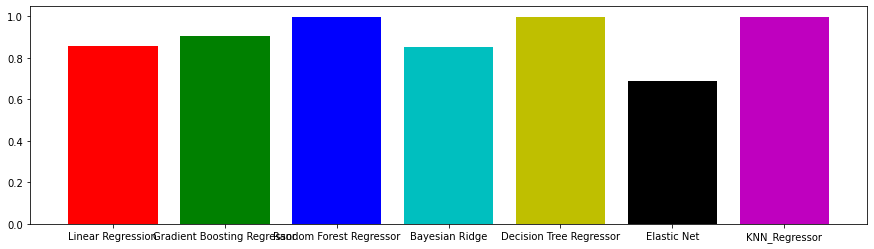

In [149]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X= PC_Data.drop(['Price'],axis=1)
y= PC_Data['Price']
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Random Forest Regressor':RandomForestRegressor(),
    'Bayesian Ridge' : linear_model.BayesianRidge(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'Elastic Net':ElasticNet(),
    'KNN_Regressor':KNeighborsRegressor()
}

accuracy=[]
for name in models:
    print(name)
    # Create the regressor: model
    model=models[name]
    # Fit the regressor to the training data
    model.fit(X_train,y_train)
    # Predict on the test data: y_pred
    y_pred=model.predict(X_test)
    accuracy.append(model.score(X_test,y_test))
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    print("R^2: {}".format(model.score(X_test, y_test)))
    print("Root Mean Squared Error: {}".format(rmse))

plt.figure(figsize=(15,4))
plt.bar(models.keys(),accuracy,color=['r','g','b','c','y','k','m'])
plt.show()


# Feature Selection

<AxesSubplot:>

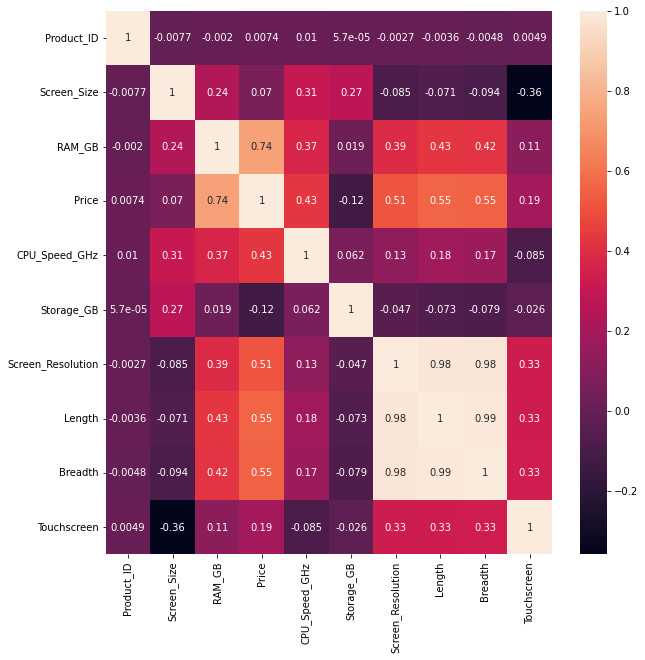

In [150]:
cor = Correlation_Data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)

In [151]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
X = PC_Data.drop(['Price'],axis=1)
y= PC_Data['Price']
estimator = RandomForestRegressor()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_


array([False,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [152]:
selector.get_feature_names_out()

array(['RAM_GB', 'Weight_Kg', 'CPU_Speed_GHz', 'Breadth', 'Notebook'],
      dtype=object)

https://www.statology.org/how-to-calculate-vif-in-python/

In [153]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('Price ~ Weight_Kg+RAM_GB+Screen_Resolution', data=PC_Data, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

VIF           variable
0  13.244798          Intercept
1   1.241560          Weight_Kg
2   1.467343             RAM_GB
3   1.249882  Screen_Resolution

##### Lasso for feature selection in scikit-learn 

###### Important to communicate important results , valuable in research science in identifying important predictors for various physical phenomena

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.038e+09, tolerance: 5.330e+06
  model = cd_fast.enet_coordinate_descent(


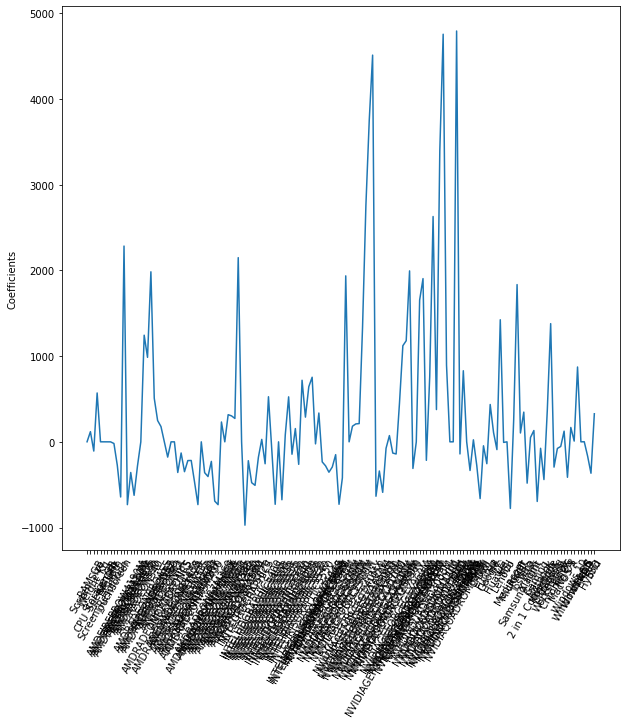

In [154]:
from sklearn.linear_model import Lasso
names = PC_Data.drop(['Price'],axis=1).columns
X = PC_Data.drop(['Price'],axis=1)
y= PC_Data['Price']
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_
plt.figure(figsize=(10, 10))
_ =plt.plot(range(len(names)),lasso_coef)
_ =plt.xticks(range(len(names)),names,rotation=60)
_ =plt.ylabel('Coefficients')
plt.show()

In [155]:
### THIS HELPS SELECT FEATURES BUT TAKES HOURS TO RUN


# from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
# X = PC_Data.drop(['Price'],axis=1)
# y= PC_Data['Price']
# lr = LinearRegression()

# efs = EFS(lr, 
#           min_features=10,
#           max_features=12,
#           scoring='r2'
#           )

# efs.fit(X, y)

# print('Best R2 score: %.2f' % efs.best_score_ * (-1))
# print('Best subset:', efs.best_idx_)
# print('Best subset (corresponding names):', efs.best_feature_names_)

# Determining the best model

['scaledGBR']: 0.900167 (0.010578) -342497.152167 13172.391671
['scaledGBR', 'scaledLR']: 0.846486 (0.013619) -527768.658652 23989.830973
['scaledGBR', 'scaledLR', 'scaledBR']: 0.846936 (0.014069) -526075.265906 24042.003433
['scaledGBR', 'scaledLR', 'scaledBR', 'scaledDTR']: 0.997549 (0.000887) -8281.447213 2333.924846
['scaledGBR', 'scaledLR', 'scaledBR', 'scaledDTR', 'scaledEN']: 0.817907 (0.011408) -628261.199305 46555.241430
['scaledGBR', 'scaledLR', 'scaledBR', 'scaledDTR', 'scaledEN', 'scaledKNNR']: 0.996953 (0.001062) -10323.875386 2875.627161


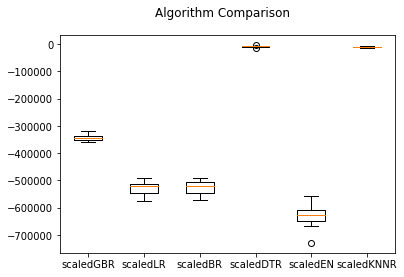

In [156]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
X = PC_Data.drop(['Price'],axis=1)
y= PC_Data['Price']
pipelines = []
pipelines.append(('scaledGBR' , (Pipeline([('scaled' , StandardScaler()),('Gradient Boosting Regressor',GradientBoostingRegressor())]))))
pipelines.append(('scaledLR' , (Pipeline([('scaled' , StandardScaler()),('Linear Regression', LinearRegression())]))))
pipelines.append(('scaledBR' , (Pipeline([('scaled' , StandardScaler()),('Bayesian Ridge' , linear_model.BayesianRidge())]))))
pipelines.append(('scaledDTR' , (Pipeline([('scaled' , StandardScaler()),('Decision Tree Regressor',DecisionTreeRegressor())]))))
pipelines.append(('scaledEN' , (Pipeline([('scaled' , StandardScaler()),('Elastic Net',ElasticNet())]))))
pipelines.append(('scaledKNNR' , (Pipeline([('scaled' , StandardScaler()),('KNN_Regressor',KNeighborsRegressor())]))))


# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)


model_name = []
results = []
r2_results=[]
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10)
    r2_crossv_results = cross_val_score(model , X_train ,y_train ,cv =kfold , scoring='r2') 
    crossv_results = cross_val_score(model , X_train ,y_train ,cv =kfold , scoring='neg_mean_squared_error')
    results.append(crossv_results)
    r2_results.append(r2_crossv_results)
    model_name.append(pipe)
    msg = "%s: %f (%f) %f %f" % (model_name,r2_crossv_results.mean(),r2_crossv_results.std(), crossv_results.mean(), crossv_results.std())
    print(msg)
    
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name)
plt.show()

# Tuning the best model: Decision Tree Regressor

##### We will first plot a learning curve to determine the results before tuning and after

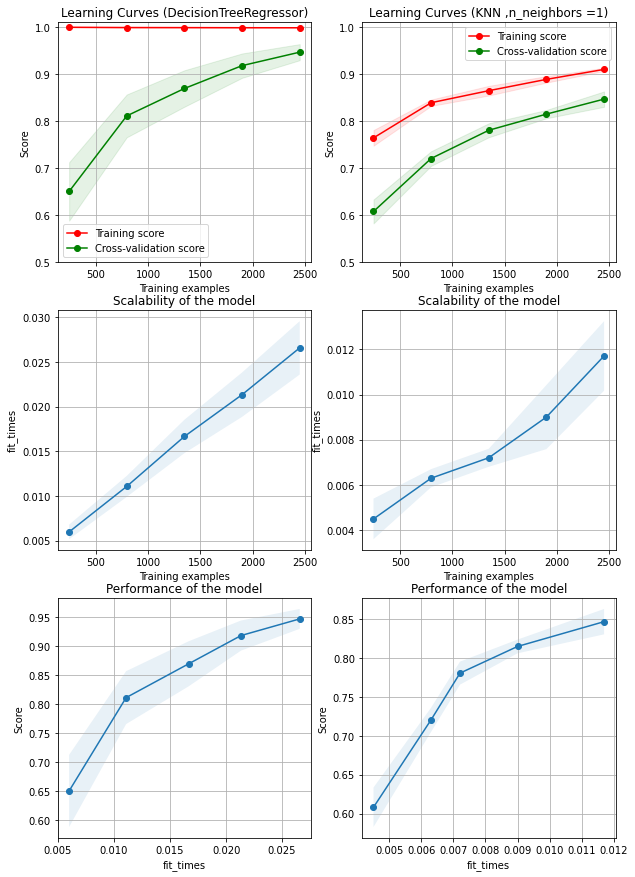

In [157]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=12)

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
   
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# X, y = load_digits(return_X_y=True)

title = r"Learning Curves (DecisionTreeRegressor)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = DecisionTreeRegressor()
plot_learning_curve(
    estimator, title, X_test, y_test, axes=axes[:, 0], ylim=(0.5, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (KNN ,n_neighbors =1)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = KNeighborsRegressor()
plot_learning_curve(
    estimator, title, X_test, y_test, axes=axes[:, 1], ylim=(0.5, 1.01), cv=cv, n_jobs=4
)

plt.show()

# Learning curve 
## Bias and Variance analysis

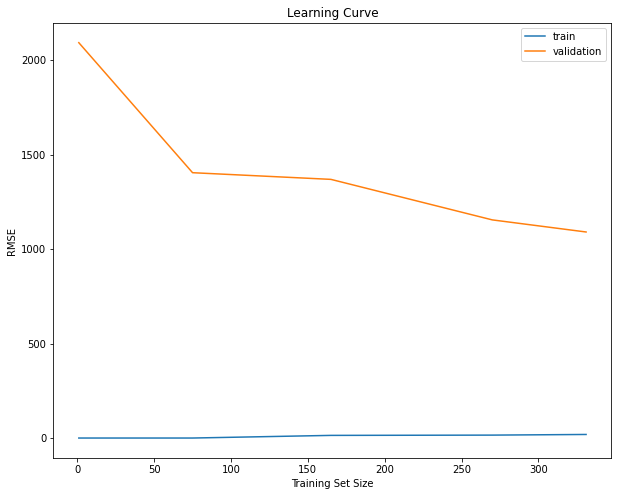

In [158]:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# overfitting
decision_tree = DecisionTreeRegressor()

train_sizes, train_scores, test_scores = learning_curve(
    estimator=decision_tree,
    X=X,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1, 75, 165, 270, 331]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()

# Regularized model
## Before and after regularization performance based on bias variance

## if overfitted will have to tune the depth of decison true , reducing the amount of depth so it does not grow fully and overfit. 

### A good way to tell will be plotting a graph

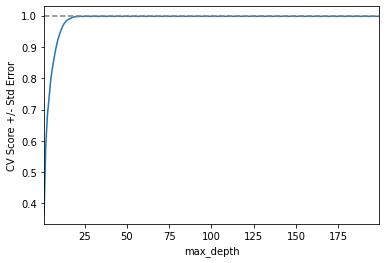

In [159]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(depth_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(depth_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('max_depth')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([depth_space[0], depth_space[-1]])
    ax.set_xscale('linear')
    plt.show()
## Choosing the right alpha for ridge regression if we using

# Import necessary modules
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
# 'DTR__max_depth'

depth_space = np.arange(1,200)
dtr_scores = []
dtr_scores_std = []

# Create a Decision Tree Regressor: DTR
DTR=DecisionTreeRegressor()

# Compute scores over range of depths
for depths in depth_space:

    # Specify the depth value to use: dtr
    DTR.max_depth = depths
    
    # Perform 3-fold CV: dtr_cv_scores
    dtr_cv_scores = cross_val_score(DTR,X,y,cv=3,scoring='r2')
    
    # Append the mean of dtr_cv_scores to dtr_scores
    dtr_scores.append(np.mean(dtr_cv_scores))
    
    # Append the std of dtr_cv_scores to dtr_scores_std
    dtr_scores_std.append(np.std(dtr_cv_scores))

# Display the plot
display_plot(dtr_scores, dtr_scores_std)


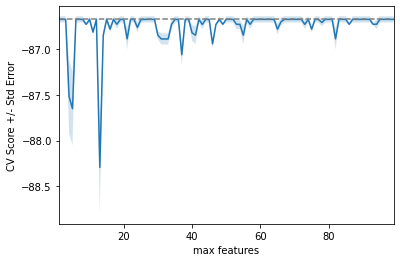

In [160]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(features_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(features_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('max features')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([features_space[0], features_space[-1]])
    ax.set_xscale('linear')
    plt.show()
## Choosing the right alpha for ridge regression if we using

# Import necessary modules
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
# 'DTR__max_depth'

features_space = np.arange(1,100)
dtr_scores = []
dtr_scores_std = []

# Create a Decision Tree Regressor: DTR
DTR=DecisionTreeRegressor()

# Compute scores over range of depths
for n in features_space:

    # Specify the max_features value to use: dtr
    DTR.max_features = n
    
    # Perform 3-fold CV: dtr_cv_scores
    dtr_cv_scores = cross_val_score(DTR,X,y,cv=3,scoring='neg_root_mean_squared_error')
    
    # Append the mean of dtr_cv_scores to dtr_scores
    dtr_scores.append(np.mean(dtr_cv_scores))
    
    # Append the std of dtr_cv_scores to dtr_scores_std
    dtr_scores_std.append(np.std(dtr_cv_scores))

# Display the plot
display_plot(dtr_scores, dtr_scores_std)


In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Setup the pipeline



X= PC_Data.drop(['Price'],axis=1)
y= PC_Data['Price']
pca = PCA()

steps = [('scaler', StandardScaler()),
         ('pca',pca),
         ('DTR',DecisionTreeRegressor(random_state=42))]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'DTR__max_depth':np.arange(1,26,4),
                'DTR__max_features':np.linspace(0.01,1,10)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print("R^2: {}".format(r2_score(y_test, y_pred)))
print("Root Mean Squared Error: {}".format(rmse))
print("Tuned Model Parameters: {}".format(cv.best_params_))


# Validation Curve

In [ ]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
X= PC_Data.drop(['Price'],axis=1)
y= PC_Data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

train_scores, valid_scores = validation_curve(
    DecisionTreeRegressor(), X_test, y_test, param_name="max_depth", param_range=np.arange(1,101),
    cv=5)


In [ ]:
param_range = np.arange(1,101)
train_mean = np.mean(valid_scores, axis=1)
train_std = np.std(valid_scores, axis=1)
test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

# Model Improvement

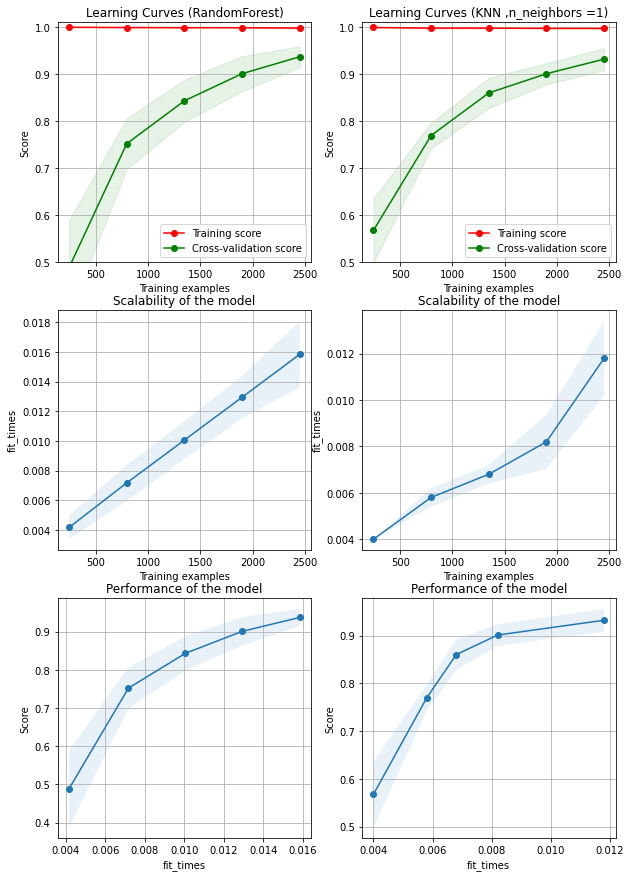

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=12)

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
   
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# X, y = load_digits(return_X_y=True)

title = r"Learning Curves (RandomForest)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = DecisionTreeRegressor(max_features= 0.01, max_depth= 65)
plot_learning_curve(
    estimator, title, X_test, y_test, axes=axes[:, 0], ylim=(0.5, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (KNN ,n_neighbors =1)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = KNeighborsRegressor(n_neighbors=1)
plot_learning_curve(
    estimator, title, X_test, y_test, axes=axes[:, 1], ylim=(0.5, 1.01), cv=cv, n_jobs=4
)

plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingRegressor
from sklearn.decomposition import PCA
X= PC_Data.drop(['Price'],axis=1)
y= PC_Data['Price']
pca = PCA()
numeric_features = ["Weight_Kg", "Screen_Resolution","RAM_GB","Price","CPU_Speed_GHz","Storage_GB"]
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler(),"pca",PCA())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ]
)

estimators = [
    ('rf', DecisionTreeRegressor(max_features= 0.8383673469387755, max_depth= 89)),
    ('knn', make_pipeline(StandardScaler(),
                          KNeighborsRegressor(n_neighbors=1)))
]
clf = StackingRegressor(
    estimators=estimators,
)
steps = [('preprocessor', preprocessor),
         ('StackingClassifier',clf)]

pipeline = Pipeline(steps)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=31)


clf.fit(X_train, y_train)
# Predict the labels of the test set: y_pred
y_pred = clf.predict(X_test)


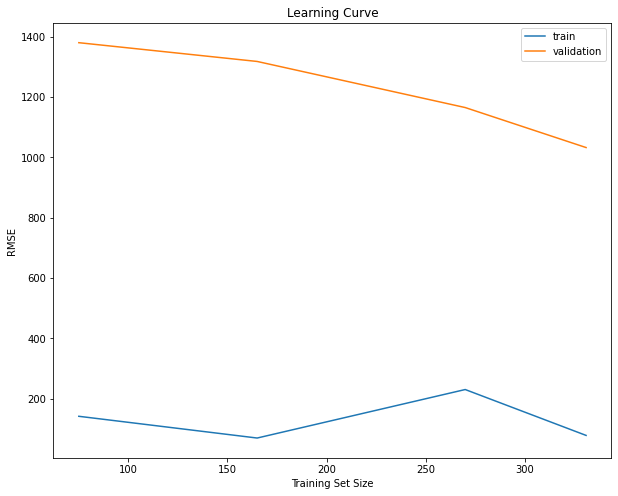

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt



train_sizes, train_scores, test_scores = learning_curve(
    estimator=clf,
    X=X,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1, 75, 165, 270, 331]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()

In [ ]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("R^2: {}".format(r2_score(y_test, y_pred)))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.9976468548191018
Root Mean Squared Error: 88.83442165905699
